In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
df1 = pd.read_csv("./data/df_final.csv")
df2 = pd.read_csv("./data/df_reorganizado.csv")

In [195]:
# GASTO TURÍSTICO TOTAL POR CCAA

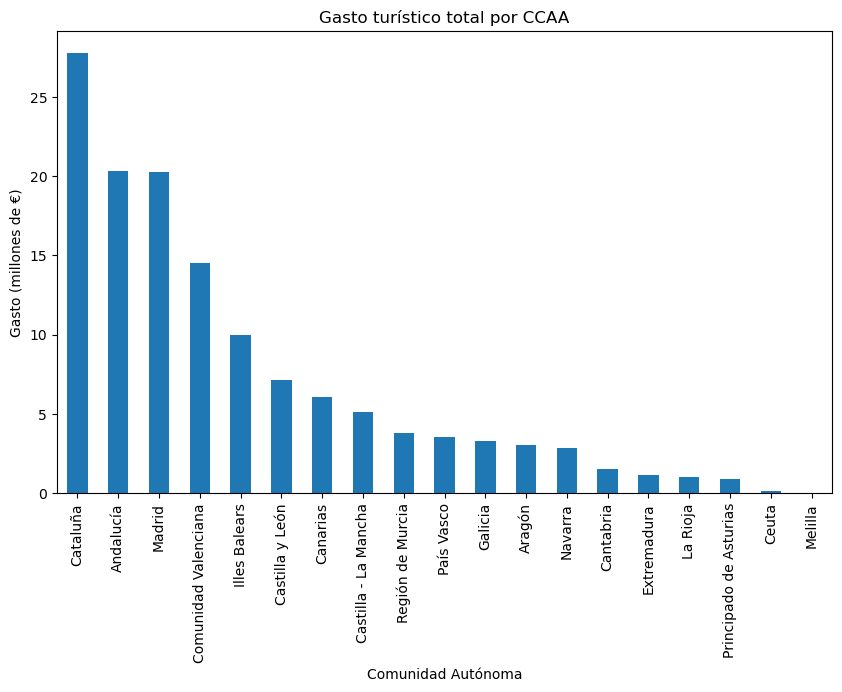

In [196]:
gasto_total = df1.groupby("CCAA")["Gasto"].sum().sort_values(ascending=False) / 1_000_000_000
gasto_total.plot(
    kind="bar",
    figsize=(10,6),
    title="Gasto turístico total por CCAA",
    ylabel="Gasto (millones de €)",
    xlabel="Comunidad Autónoma")
plt.show()

In [197]:
# TOP 5 COMUNIDADES MÁS EXPERIMENTLAES SEGÚN GASTO TURISTA

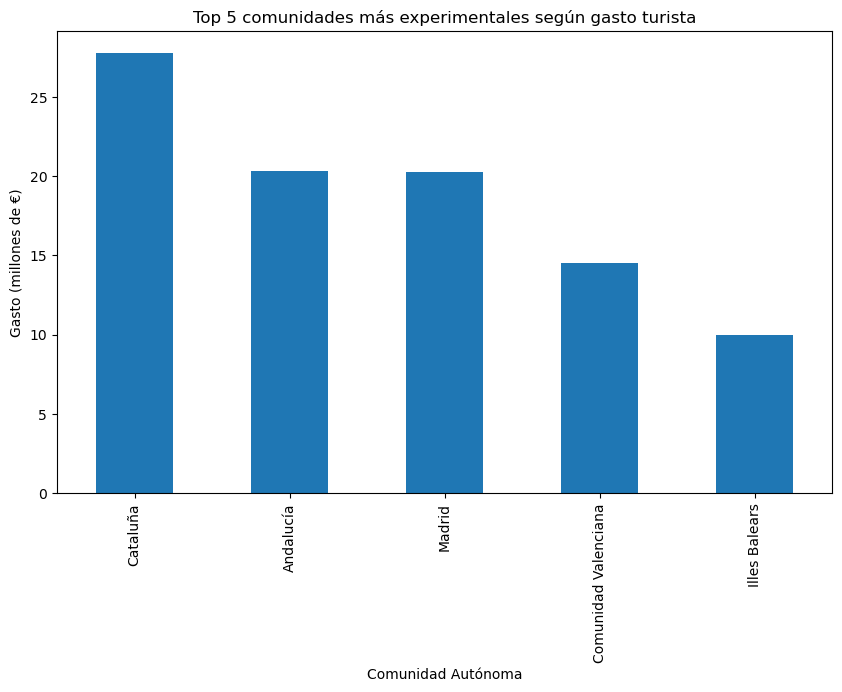

In [198]:
top5_gasto = gasto_total.head(5)
top5_gasto.plot(
    kind="bar",
    figsize=(10,6),
    title="Top 5 comunidades más experimentales según gasto turista",
    ylabel="Gasto (millones de €)",
    xlabel="Comunidad Autónoma")
plt.show()

In [199]:
# TUSITAS INTERNACIONALES Y NACIONALES POR COMUNIDADES ENTRE 2019 Y 2025

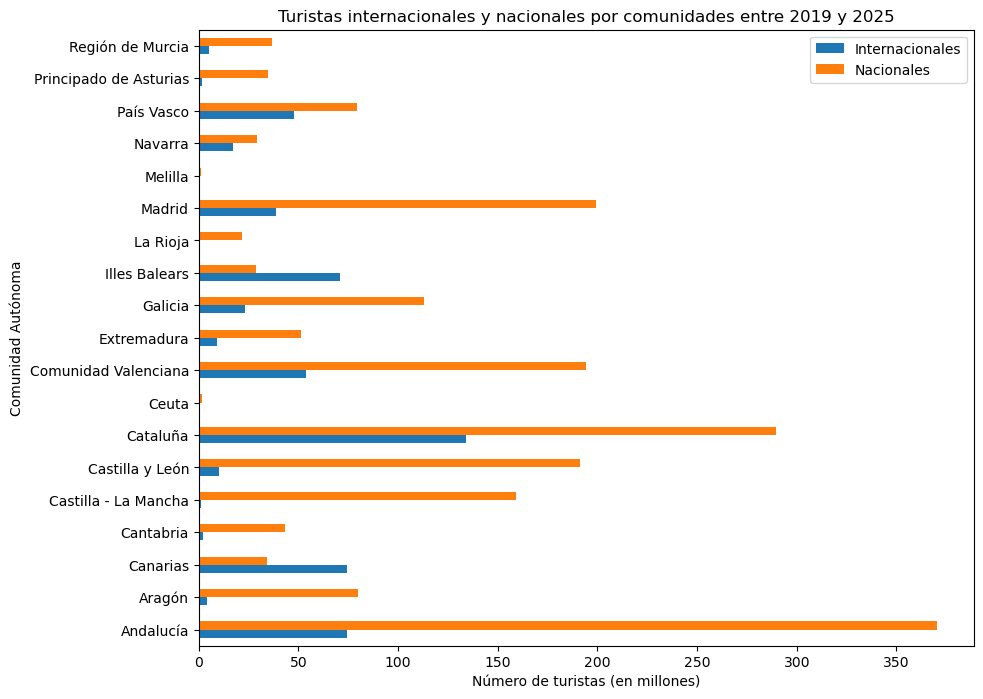

In [232]:
turistas_ccaa = df1.groupby("CCAA")[["Turistas_Internacionales", "Turistas_Nacionales"]].sum()
turistas_ccaa[["Turistas_Internacionales", "Turistas_Nacionales"]] = turistas_ccaa[["Turistas_Internacionales", "Turistas_Nacionales"]] / 1_000_000
turistas_ccaa[["Turistas_Internacionales", "Turistas_Nacionales"]].plot(
    kind="barh",
    figsize=(10,8),
    title="Turistas internacionales y nacionales por comunidades entre 2019 y 2025",
    xlabel="Número de turistas (en millones)",
    ylabel="Comunidad Autónoma")
plt.legend(["Internacionales", "Nacionales"])
plt.show()

In [201]:
# TOP 5 COMUNIDADES SEGÚN NÚMERO DE TURISTAS

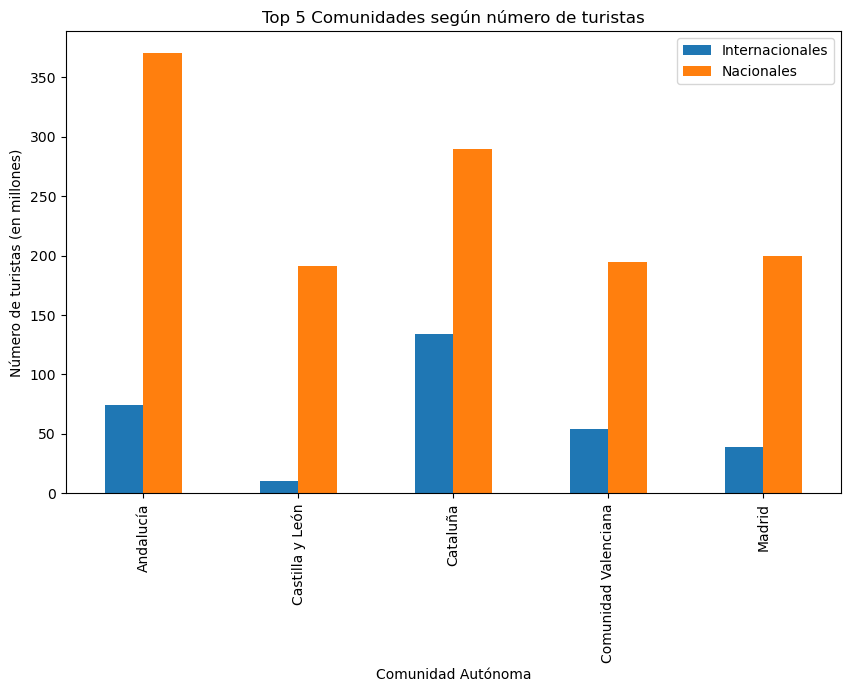

In [234]:
df_top5_ccaa = df1[df1["CCAA"].isin(top5_ccaa.index)]
ccaa_top5 = df_top5_ccaa.groupby("CCAA")[["Turistas_Internacionales", "Turistas_Nacionales", "Gasto"]].sum()
ccaa_top5[["Turistas_Internacionales", "Turistas_Nacionales"]] = ccaa_top5[["Turistas_Internacionales", "Turistas_Nacionales"]] / 1_000_000
ccaa_top5[["Turistas_Internacionales", "Turistas_Nacionales"]].plot(
    kind="bar",
    figsize=(10,6),
    title="Top 5 Comunidades según número de turistas",
    ylabel="Número de turistas (en millones)",
    xlabel="Comunidad Autónoma")
plt.legend(["Internacionales", "Nacionales"])
plt.show()

In [203]:
# TOP 5 COMUNIDADES SEGÚN NÚMERO DE TURSITAS (ORDENADAS)

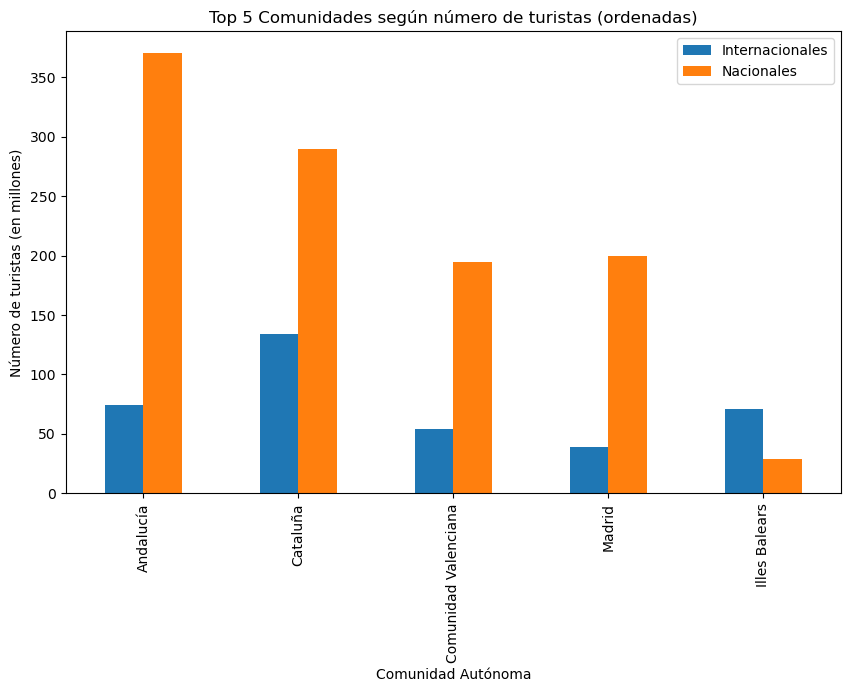

In [239]:
ccaa_top5[['Turistas_Internacionales', 'Turistas_Nacionales']] = ccaa_top5[['Turistas_Internacionales', 'Turistas_Nacionales']] / 1_000_000
ccaa_top5['Turistas_Totales'] = ccaa_top5['Turistas_Internacionales'] + ccaa_top5['Turistas_Nacionales']
ccaa_top5 = ccaa_top5.sort_values(by='Turistas_Totales', ascending=False)
ccaa_top5[['Turistas_Internacionales', 'Turistas_Nacionales']].plot(
    kind='bar',
    figsize=(10,6),
    title="Top 5 Comunidades según número de turistas (ordenadas)",
    ylabel="Número de turistas (en millones)",
    xlabel="Comunidad Autónoma")

plt.legend(["Internacionales", "Nacionales"])
plt.show()

In [205]:
# DATOS TOTALES DE TURISMO POR TIPO DE TURISTAS EN GRÁFICO DE PASTEL

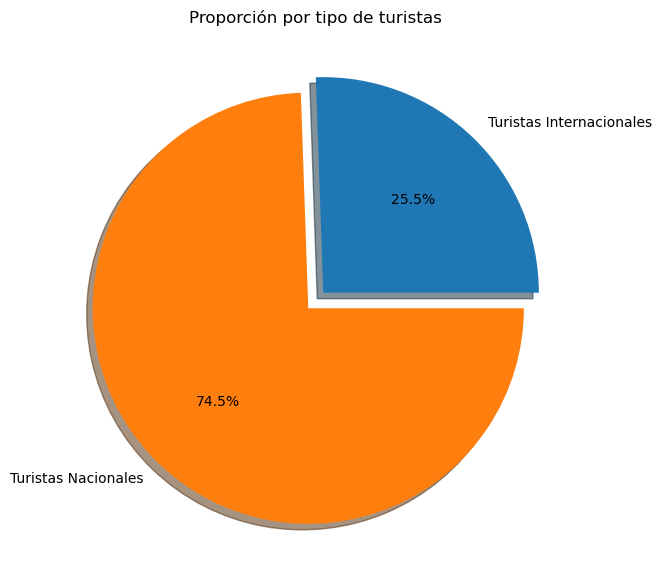

In [240]:
gasto_sumado = gasto_top5[["Turistas_Internacionales", "Turistas_Nacionales"]].sum()
gasto_sumado.plot.pie(
    shadow=True,
    labels=["Turistas Internacionales", "Turistas Nacionales"],
    autopct="%1.1f%%",
    explode=[0.05, 0.05],
    figsize=(7,7))

plt.title("Proporción por tipo de turistas")
plt.show()

In [207]:
# GRÁFICO DE SUBPLOT PARA VER LAS 3 VARIABLES CON LAS QUE ESTAMOS TRABAJANDO ENTRE 2019 y 2025

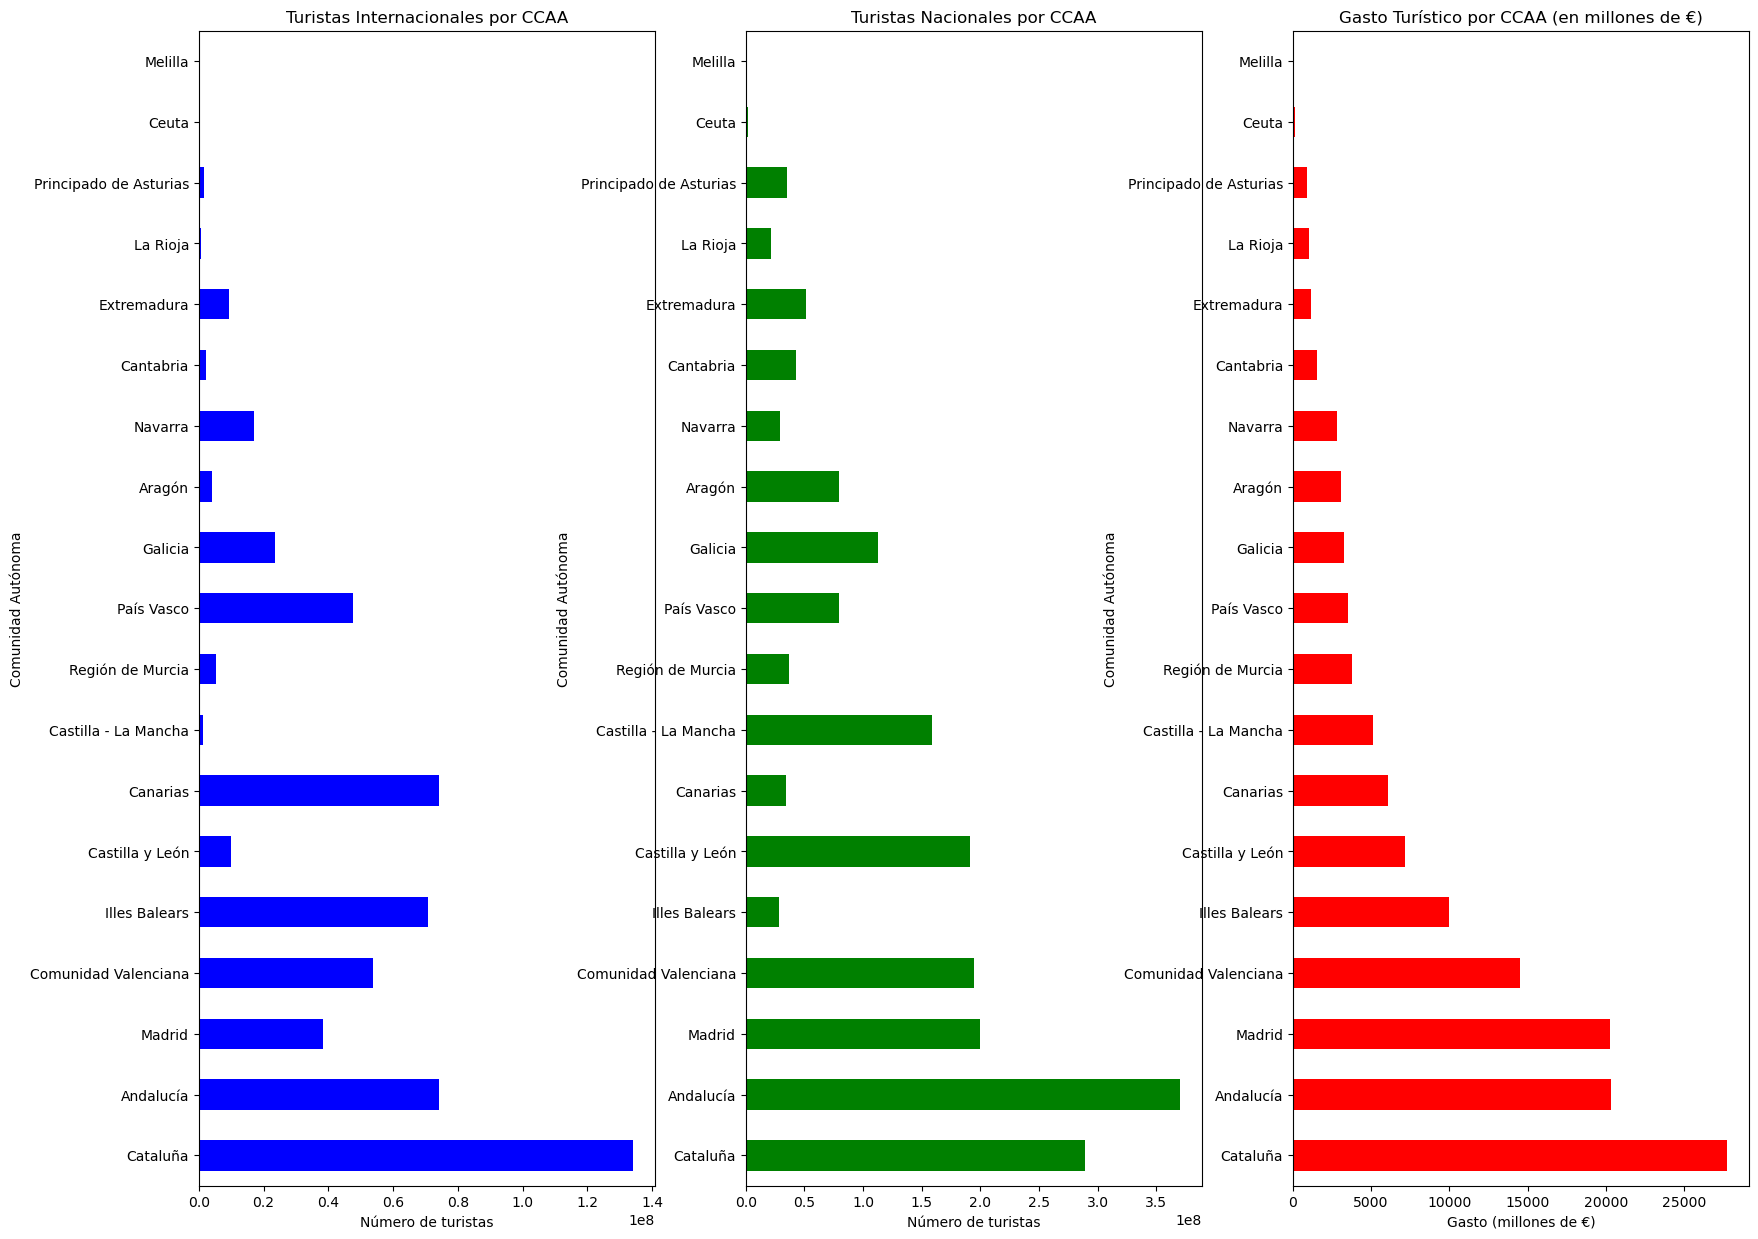

In [248]:
df_conjunta = df1.groupby("CCAA")[["Turistas_Internacionales", "Turistas_Nacionales", "Gasto"]].sum()

df_conjunta = df_conjunta.sort_values(by="Gasto", ascending=False)

plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
df_conjunta["Turistas_Internacionales"].plot(kind="barh", color="blue")
plt.title("Turistas Internacionales por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Número de turistas")

plt.subplot(1, 3, 2)
df_conjunta["Turistas_Nacionales"].plot(kind="barh", color="green")
plt.title("Turistas Nacionales por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Número de turistas")

plt.subplot(1, 3, 3)
(df_conjunta["Gasto"] / 1_000_000).plot(kind="barh", color="red")
plt.title("Gasto Turístico por CCAA (en millones de €)")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Gasto (millones de €)")

plt.show()

In [209]:
# ORDEMOS CADA UNA DE MAYOR A MENOR

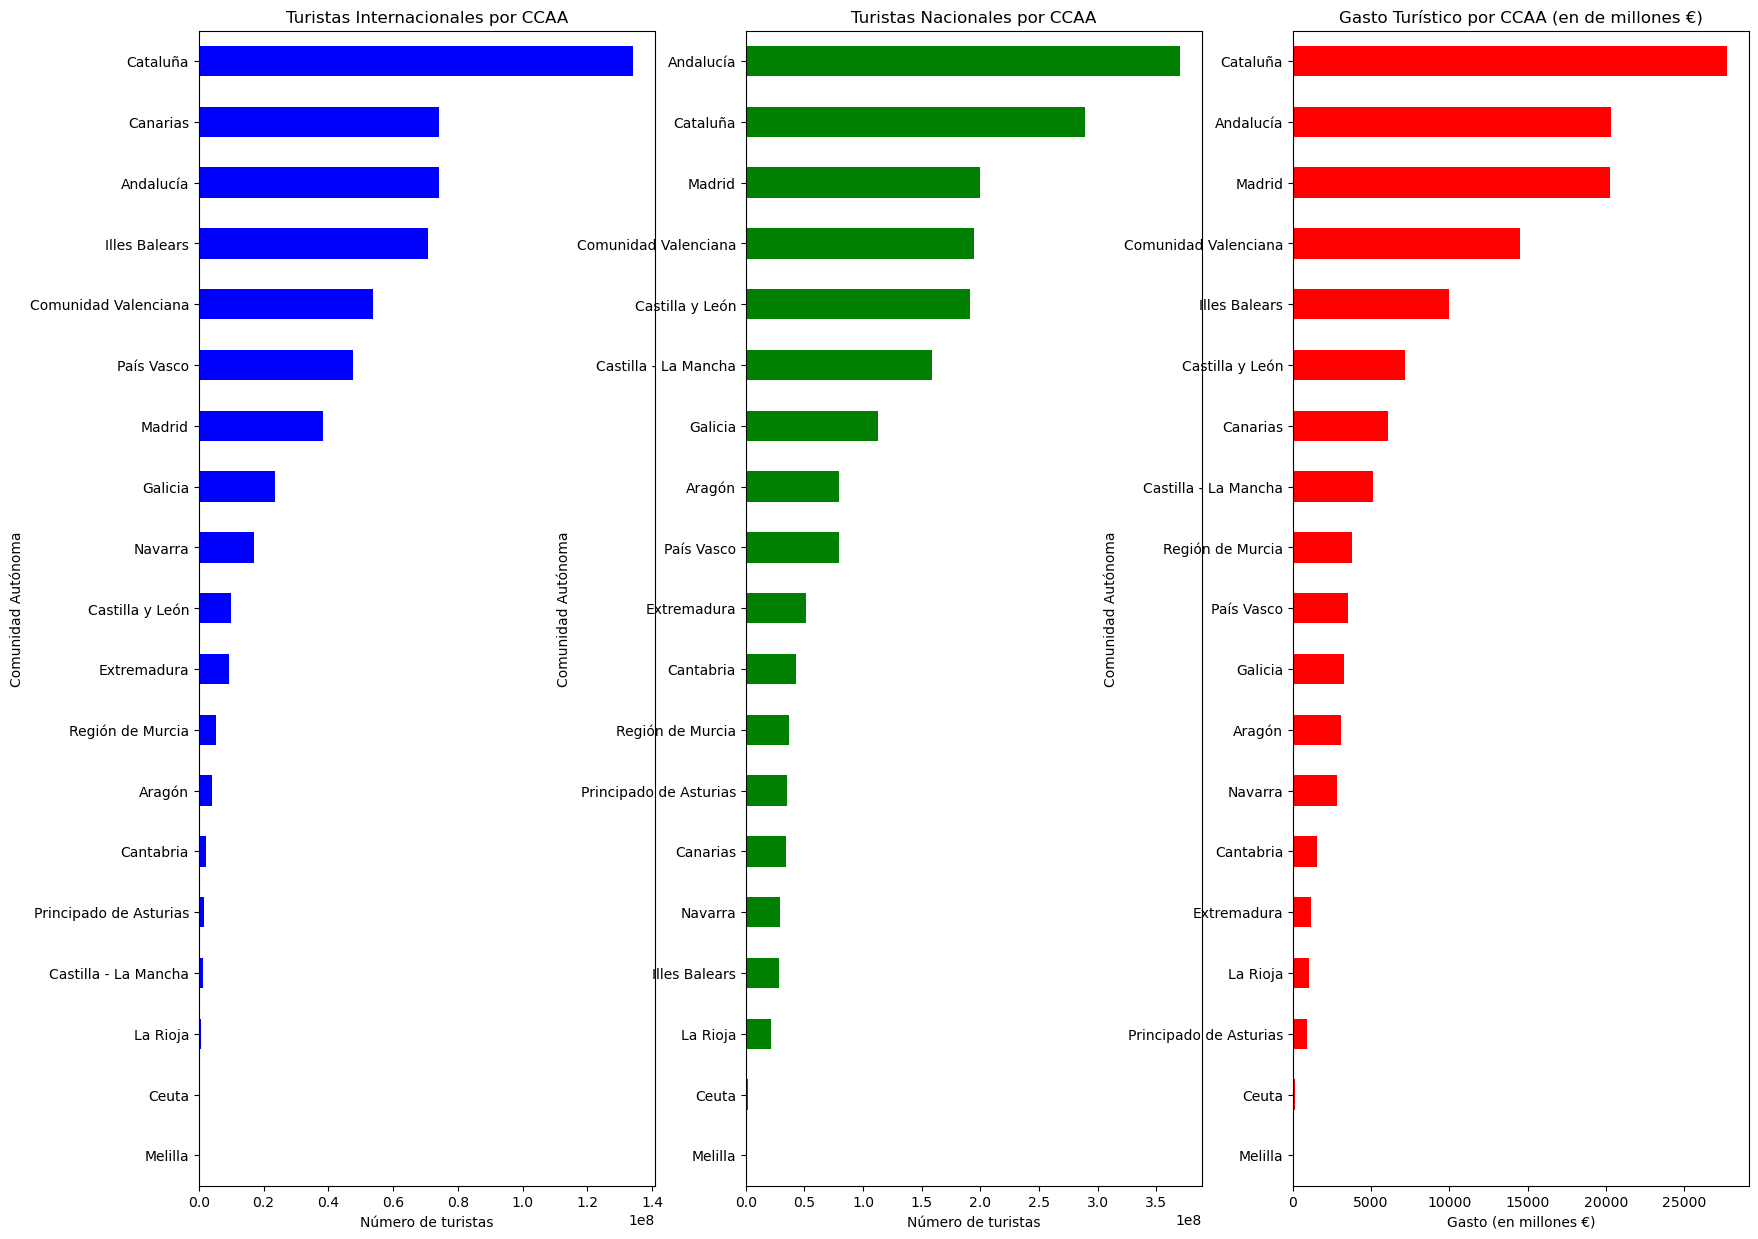

In [249]:
df_conjunta = df1.groupby("CCAA")[["Turistas_Internacionales", "Turistas_Nacionales", "Gasto"]].sum()

plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
df_conjunta_sorted = df_conjunta.sort_values(by="Turistas_Internacionales", ascending=True)  # ascending=True porque barras horizontales
df_conjunta_sorted["Turistas_Internacionales"].plot(kind="barh", color="blue")
plt.title("Turistas Internacionales por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Número de turistas")

plt.subplot(1, 3, 2)
df_conjunta_sorted = df_conjunta.sort_values(by="Turistas_Nacionales", ascending=True)
df_conjunta_sorted["Turistas_Nacionales"].plot(kind="barh", color="green")
plt.title("Turistas Nacionales por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Número de turistas")

plt.subplot(1, 3, 3)
df_conjunta_sorted = df_conjunta.sort_values(by="Gasto", ascending=True)
(df_conjunta_sorted["Gasto"] / 1_000_000).plot(kind="barh", color="red")
plt.title("Gasto Turístico por CCAA (en de millones €)")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Gasto (en millones €)")

plt.show()

In [211]:
# EVOLUCIÓN DE TURISTAS INTERNACIONALES EN 4 CCAA EN GRÁFICO DE LINEAS

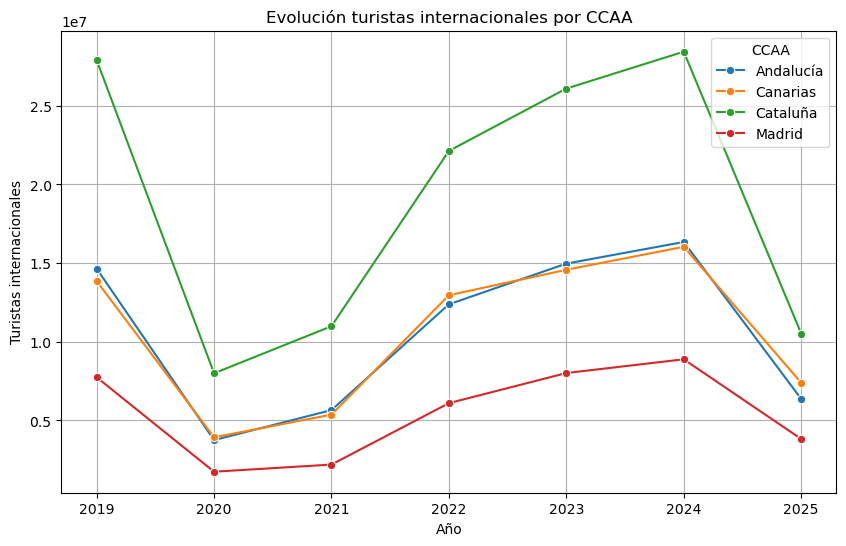

In [212]:
ccaa_elegidas = ["Andalucía", "Cataluña", "Madrid", "Canarias"]

df_lineas = df1[df1["CCAA"].isin(ccaa_elegidas)]

plt.figure(figsize=(10,6))
sns.lineplot(data=df_lineas, x="Año", y="Turistas_Internacionales", hue="CCAA", marker="o")
plt.title("Evolución turistas internacionales por CCAA")
plt.ylabel("Turistas internacionales")
plt.grid(True)
plt.show()

In [213]:
# HEATMAP DE CORRELACIONES

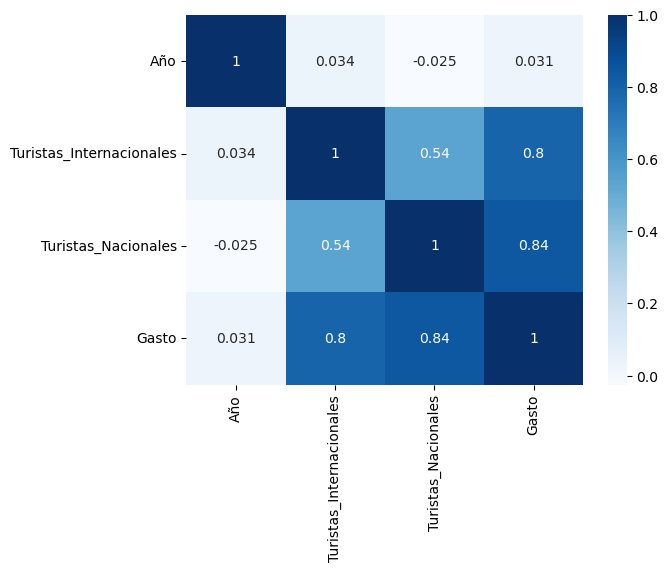

In [214]:
sns.heatmap(data = df1._get_numeric_data().corr(),
            annot = True,
            cmap = "Blues")
plt.show()